<a href="https://colab.research.google.com/github/rodrigo-peixot/Projects/blob/main/Case_Mercado_Financeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv('/content/Vase_004 - Magalu - Sem Resolução.xlsx - Tab_Dados.csv')

df.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,1/4/2021,"25,58","24,87","25,26","25,20",25.706.100,"25,18"
1,1/5/2021,"25,18","24,34","25,10","24,76",25.431.900,"24,74"
2,1/6/2021,"24,66","23,42","24,65","23,46",51.799.000,"23,44"
3,1/7/2021,"23,85","22,95","23,64","23,16",42.146.600,"23,14"
4,1/8/2021,"24,30","23,02","23,19","23,84",43.988.100,"23,82"


In [85]:
df.shape

(247, 7)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        247 non-null    object
 1   Maior       247 non-null    object
 2   Menor       247 non-null    object
 3   Abertura    247 non-null    object
 4   Fechamento  247 non-null    object
 5   Volume      247 non-null    object
 6   Adj Close   247 non-null    object
dtypes: object(7)
memory usage: 13.6+ KB


In [87]:
df['Data'] = pd.to_datetime(df['Data'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    object        
 2   Menor       247 non-null    object        
 3   Abertura    247 non-null    object        
 4   Fechamento  247 non-null    object        
 5   Volume      247 non-null    object        
 6   Adj Close   247 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.6+ KB


In [88]:
df.describe()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247,247,247,247,247,247,247
unique,247,217,229,225,227,247,228
top,2021-01-04 00:00:00,"23,85","20,21","6,42","21,65",25.706.100,"21,63"
freq,1,3,3,3,3,1,3
first,2021-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df1 = df.set_index('Data') 

df1['Fechamento'] = df1['Fechamento'].str.replace(',','.')

df1['Fechamento'] = df1['Fechamento'].astype(float)


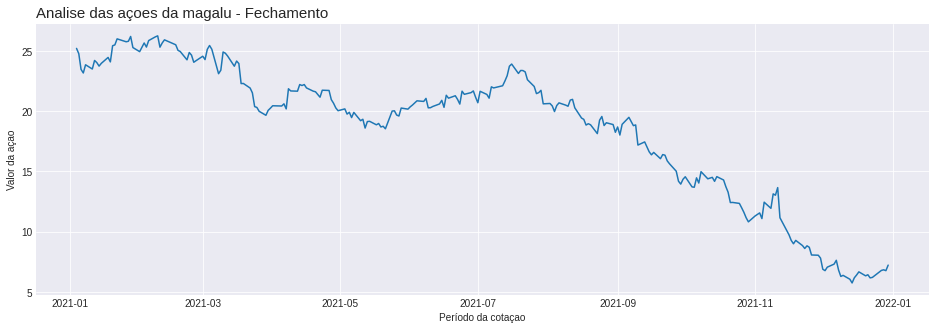

In [90]:
plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(16,5) )
plt.title('Analise das açoes da magalu - Fechamento', fontsize=15, loc='left')
plt.plot( df1.index, df1['Fechamento'] );

plt.xlabel('Período da cotaçao')
plt.ylabel('Valor da açao');

In [91]:
# MEDIAS MOVEIS

media_movel = df1['Fechamento'].rolling(5).mean()
media_tendencia = df1['Fechamento'].rolling(30).mean()

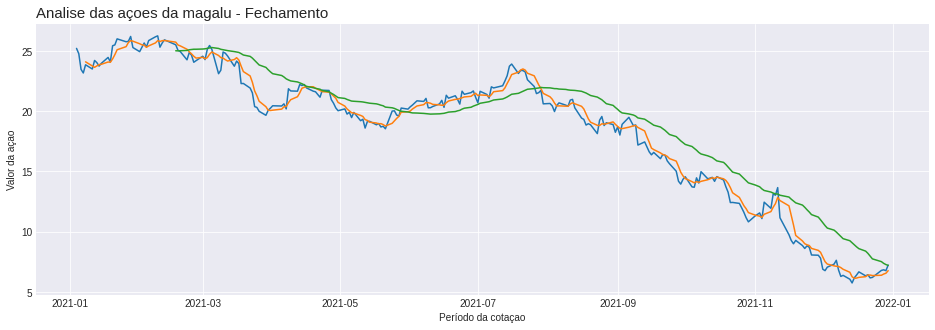

In [92]:
plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(16,5) )
plt.title('Analise das açoes da magalu - Fechamento', fontsize=15, loc='left')

plt.plot( df1.index, df1['Fechamento'] )
plt.plot( media_movel.index, media_movel )
plt.plot( media_tendencia.index, media_tendencia );


plt.xlabel('Período da cotaçao')
plt.ylabel('Valor da açao');

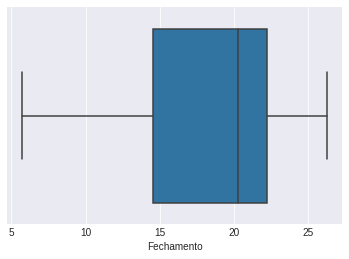

In [93]:
sns.boxplot(data=df1, x='Fechamento')

In [94]:
df['Fechamento'] = df['Fechamento'].str.replace(',','.')

df['Fechamento'] = df['Fechamento'].astype(float)

In [95]:
df.dtypes

Data          datetime64[ns]
Maior                 object
Menor                 object
Abertura              object
Fechamento           float64
Volume                object
Adj Close             object
dtype: object

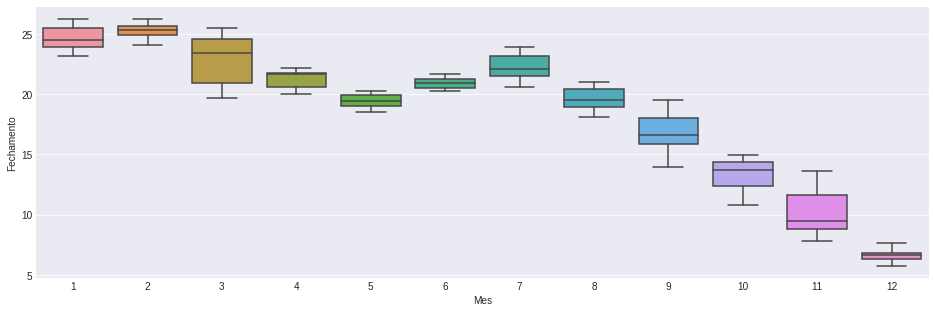

In [96]:
# Boxplot mensal

df['Mes'] = df['Data'].dt.month

plt.figure( figsize=(16,5))
sns.boxplot ( data=df, x='Mes', y='Fechamento');

In [97]:
df.groupby(['Mes']).describe()['Fechamento']

,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
1,19.0,24.644737,0.960280,23.16,23.9000,24.450,25.4550,26.19
2,18.0,25.208889,0.656021,24.05,24.8775,25.300,25.6500,26.24
3,23.0,22.855217,1.976698,19.65,20.9400,23.390,24.5600,25.44
4,20.0,21.249000,0.735297,20.03,20.5600,21.625,21.7600,22.20
5,21.0,19.430476,0.564973,18.53,18.9700,19.460,19.9000,20.25
6,21.0,20.898095,0.463116,20.27,20.5000,20.890,21.2700,21.67
7,21.0,22.232857,0.977574,20.60,21.5300,22.040,23.1200,23.90
8,22.0,19.656818,0.885827,18.13,18.8975,19.485,20.4525,20.97
9,21.0,16.746190,1.628581,13.94,15.8700,16.570,18.0100,19.48


In [99]:
# Plot de Bovespa

Grafico = go.Figure(
    data=[
          go.Candlestick(
              x=df1.index,
              open=df1['Abertura'],
              high=df1['Maior'],
              low=df1['Menor'],
              close=df1['Fechamento']
          )
    ]
)
Grafico.update_layout( xaxis_rangeslider_visible=False)

Grafico.show()
